In [1]:
library(circlize)
library(dplyr)

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
jon.chromosomes <- read.table("jon_chromosomes.tsv", sep="\t", header=T)

In [3]:
jon.chromosomes$Chromosome <- as.character(jon.chromosomes$Chromosome)
row.names(jon.chromosomes) <- jon.chromosomes$Chromosome
jon.chromosomes$ChromEnd <- as.numeric(jon.chromosomes$ChromEnd)
head(jon.chromosomes)

,Chromosome,ChromStart,ChromEnd
,<chr>,<int>,<dbl>
1,1,0,377184193
2,2,0,215601868
3,3,0,171483441
4,4,0,160257144
5,5,0,150150016
6,6,0,138728498


In [4]:
x <- subset(jon.chromosomes, ChromEnd > 8671703)
x


,Chromosome,ChromStart,ChromEnd
,<chr>,<int>,<dbl>
1,1,0,377184193
2,2,0,215601868
3,3,0,171483441
4,4,0,160257144
5,5,0,150150016
6,6,0,138728498
7,7,0,132378838
8,8,0,130773666
9,9,0,112367378


In [5]:
dmr <- read.table("regression.jon2.hatch3.adjusted.dmrs.bed", sep="\t")
dmr$V1 <- as.character(dmr$V1)

In [6]:
over <- select(dmr, V1, V2, V3, V6)
under <- over
over <- subset(over, V6>0)
under <- subset(under, V6<0)
over

,V1,V2,V3,V6
,<chr>,<int>,<int>,<dbl>
1105,1,2188300,2188302,0.5172410
1106,1,2192822,2192824,0.6111110
1107,1,2204004,2204012,0.0186017
1113,1,2206369,2206371,0.4705880
1114,1,2206468,2206470,0.3703700
1130,1,2220112,2220119,0.1363640
1223,1,2539692,2539694,0.4687500
1231,1,2565252,2565254,0.5333330
1251,1,2633310,2633312,0.3636360


In [7]:
features <- read.table("_sorted.gff", sep="\t")
features$V1 <- as.character(features$V1)

In [8]:
features <- select(features, V1, V4, V5)

In [9]:
jon_entropy <- read.table("merged_samples/jon.combined.me.sorted.means.tab", sep="\t") 
jon_entropy <- subset(jon_entropy, V1 < 30)
jon_entropy$V1 <- as.character(jon_entropy$V1)
dim(jon_entropy)

[1] 785   4

In [10]:
hatchling_entropy <- read.table("merged_samples/hatchling.combined.me.sorted.means.tab", sep="\t")
hatchling_entropy <- subset(hatchling_entropy, V1 < 30)
hatchling_entropy$V1 <- as.character(hatchling_entropy$V1)
dim(hatchling_entropy)

[1] 785   4

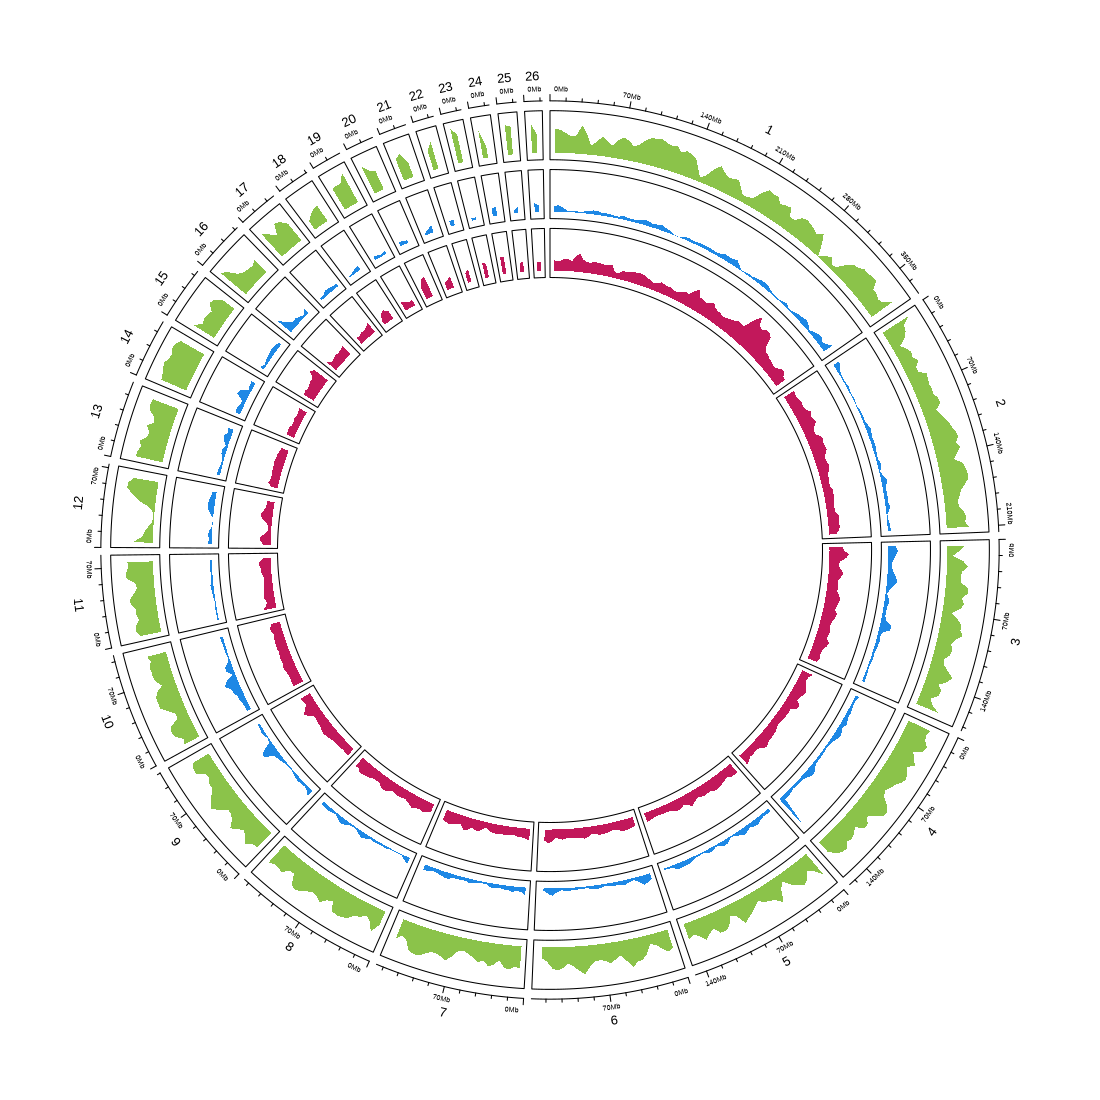

In [11]:
circos.clear()
options(repr.plot.width=11, repr.plot.height=11, repr.plot.res = 100)
circos.par( start.degree = 90, "cell.padding" = c(0.02, 0, 0.02, 0))
circos.genomicInitialize(x)
circos.genomicDensity(features, col = c("#8BC34A"), track.height = 0.1)
circos.genomicDensity(over, col = c("#1E88E5"), track.height = 0.1)
circos.genomicDensity(under, col = c("#C2185B"), track.height = 0.1)

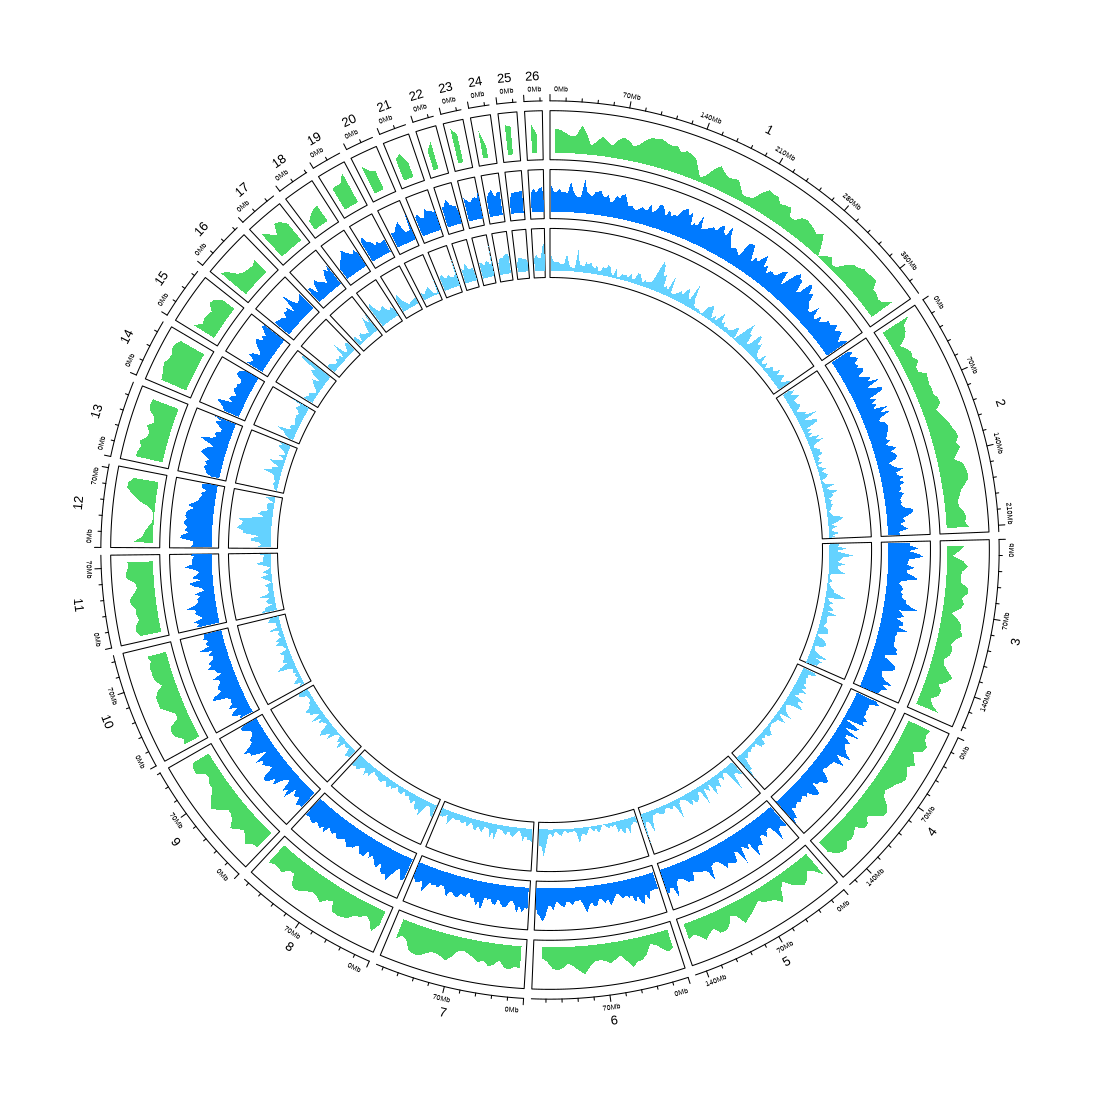

In [12]:
circos.clear()
options(repr.plot.width=11, repr.plot.height=11, repr.plot.res = 100)
circos.par( start.degree = 90, "cell.padding" = c(0.02, 0, 0.02, 0))
circos.genomicInitialize(x)
circos.genomicDensity(features, col = c("#4CD964"), track.height = 0.1)
circos.genomicTrack(jon_entropy, panel.fun = function(region, value, ...){
    circos.genomicLines(region,value, col=c("#007AFF"), area=T, border=c("#FFFFFF00"))
}, track.height = 0.1)
circos.genomicTrack(hatchling_entropy, panel.fun = function(region, value, ...){
    circos.genomicLines(region,value, col=c("#64D2FF"), area=T, border=c("#FFFFFF00"))
}, track.height = 0.1)

In [13]:
Chromosome <- c("1")
ChromeStart <- c(270000000)
ChromeEnd <- c(320000000)
chrom1_270_320 <- data.frame(Chromosome, ChromeStart, ChromeEnd)
chrom1_270_320$ChromeStart <- as.integer(chrom1_270_320$ChromeStart)
chrom1_270_320$ChromeEnd <- as.integer(chrom1_270_320$ChromeEnd)

In [14]:
dim(over)

[1] 27885     4

In [15]:
subset(features, V1=="1" & V4 >= 270000000 & V5 <= 320000000)

,V1,V4,V5
,<chr>,<int>,<int>
2203,1,270129471,270360415
2204,1,270465169,270507180
2205,1,270564894,270577186
2206,1,270605908,270653593
2207,1,270659811,270703871
2208,1,270661350,270661733
2209,1,270731878,270745043
2210,1,270819113,270860015
2211,1,270887320,270990535


In [16]:
jon_meth <- read.table("merged_samples/jon.merged.dnmtools.CpG.meth.means.tab", sep="\t") 
jon_meth <- subset(jon_meth, V1 < 30)
jon_meth$V1 <- as.character(jon_meth$V1)
dim(jon_meth)

[1] 785   4

In [17]:
hatchling_meth <- read.table("merged_samples/hatchling.merged.dnmtools.CpG.meth.means.tab", sep="\t") 
hatchling_meth <- subset(hatchling_meth, V1 < 30)
hatchling_meth$V1 <- as.character(hatchling_meth$V1)
dim(hatchling_meth)

[1] 785   4

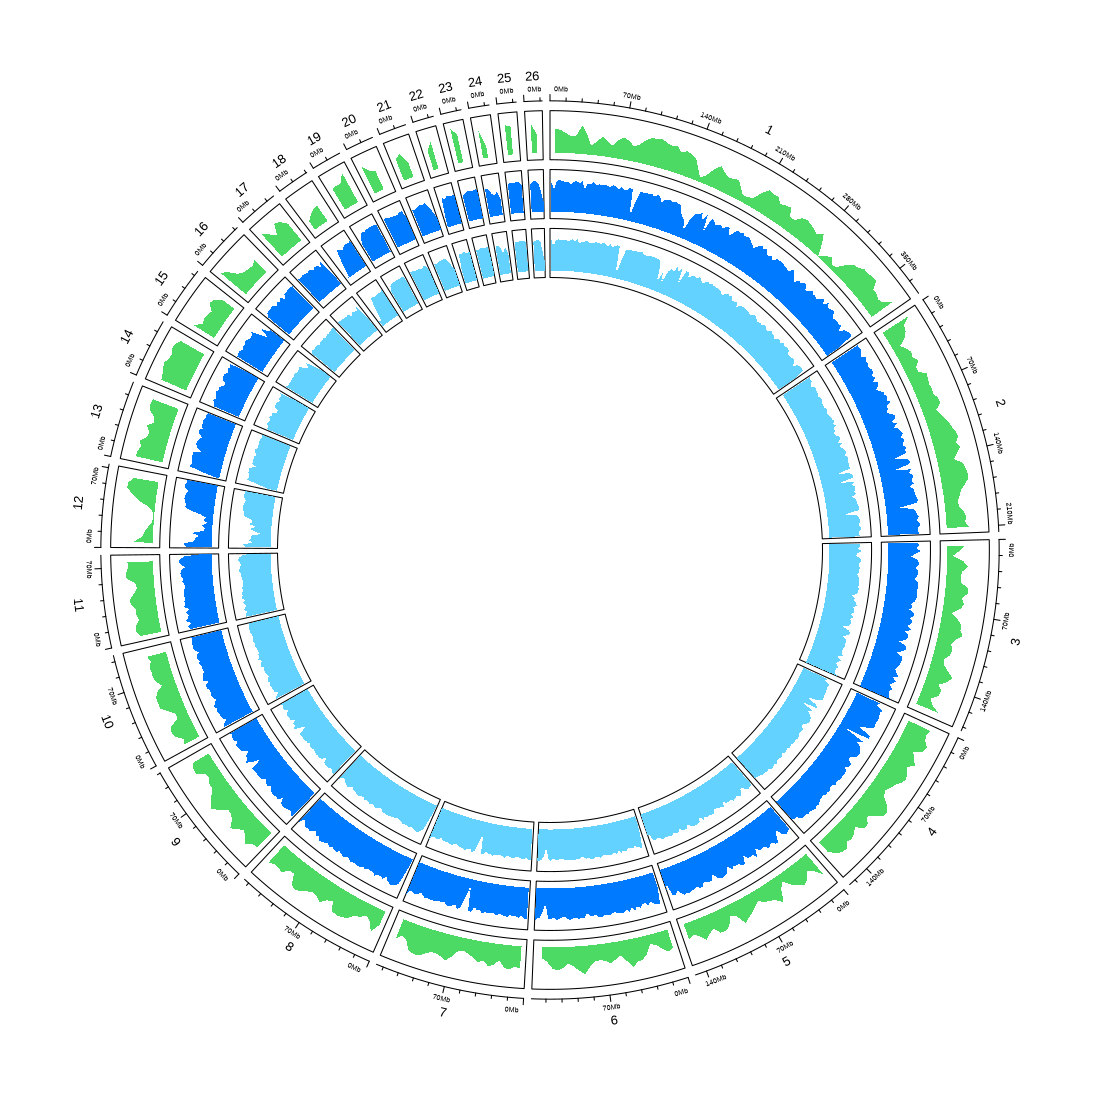

In [18]:
circos.clear()
options(repr.plot.width=11, repr.plot.height=11, repr.plot.res = 100)
circos.par( start.degree = 90, "cell.padding" = c(0.02, 0, 0.02, 0))
circos.genomicInitialize(x)
circos.genomicDensity(features, col = c("#4CD964"), track.height = 0.1)
circos.genomicTrack(jon_meth, panel.fun = function(region, value, ...){
    circos.genomicLines(region,value, col=c("#007AFF"), area=T, border=c("#FFFFFF00"))
}, track.height = 0.1)
circos.genomicTrack(hatchling_meth, panel.fun = function(region, value, ...){
    circos.genomicLines(region,value, col=c("#64D2FF"), area=T, border=c("#FFFFFF00"))
}, track.height = 0.1)

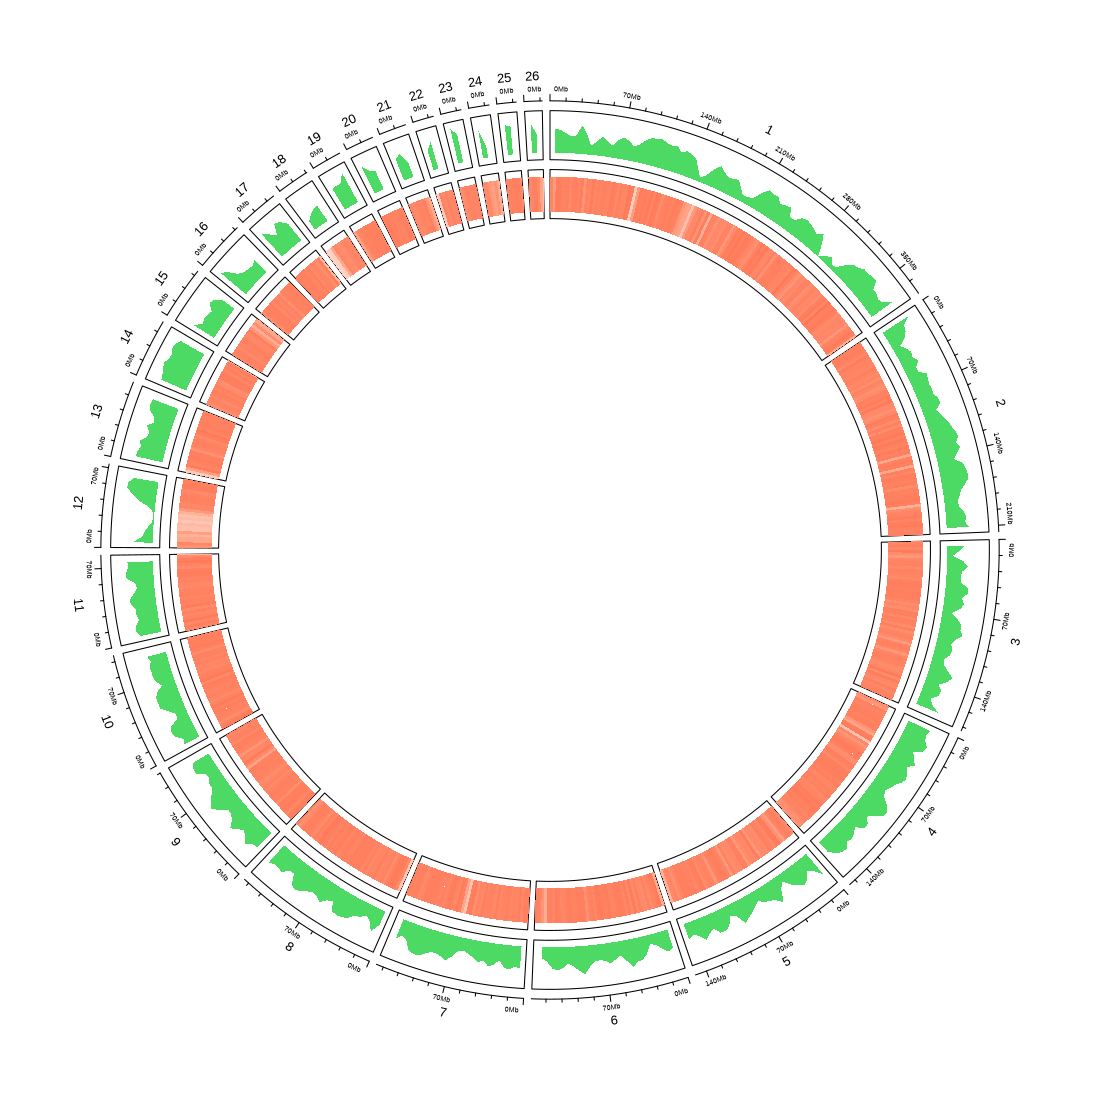

In [19]:
circos.clear()
options(repr.plot.width=11, repr.plot.height=11, repr.plot.res = 100)
circos.par( start.degree = 90, "cell.padding" = c(0.02, 0, 0.02, 0))
circos.genomicInitialize(x)
circos.genomicDensity(features, col = c("#4CD964"), track.height = 0.1)
col_fun = colorRamp2(breaks = c(-1, 0, 1), colors = c("green", "white", "red"))
circos.genomicTrack(jon_meth, stack = TRUE, 
    panel.fun = function(region, value, ...) {
        circos.genomicRect(region, value, col = col_fun(value[[1]]), border = NA, ...)
}, track.height=.1)

In [20]:
jon_meth

,V1,V2,V3,V4
,<chr>,<int>,<int>,<dbl>
1,1,4735,2999889,0.6170990
2,1,3000025,5999866,0.5225196
3,1,6000047,8999995,0.6404713
4,1,9000006,11999998,0.6556636
5,1,12000021,14999708,0.6344966
6,1,15000229,17999979,0.6287609
7,1,18000029,20999820,0.6374949
8,1,21000095,23999899,0.5953781
9,1,24000221,26999923,0.6362766


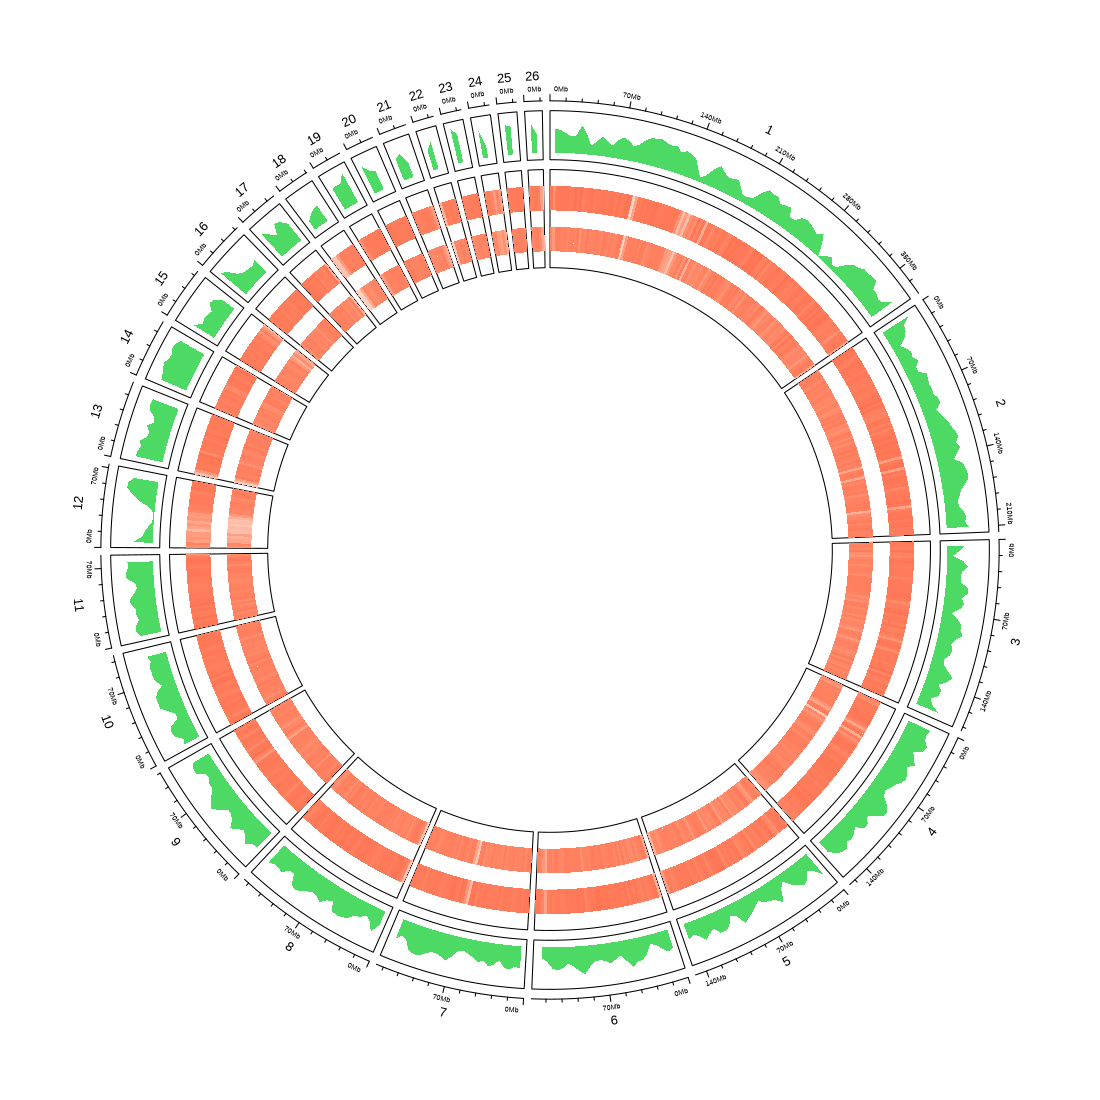

In [21]:
circos.clear()
options(repr.plot.width=11, repr.plot.height=11, repr.plot.res = 100)
circos.par( start.degree = 90, "cell.padding" = c(0.02, 0, 0.02, 0))
circos.genomicInitialize(x)
circos.genomicDensity(features, col = c("#4CD964"), track.height = 0.1)
col_fun = colorRamp2(breaks = c(0, 1), colors = c("white", "red"))
circos.genomicTrack(list(jon_meth, hatchling_meth), stack = TRUE, 
    panel.fun = function(region, value, ...) {
        i = getI(...)
        circos.genomicRect(region, value, ytop = i + 0.3, ybottom = i - 0.3,
            col = col_fun(value[[1]]), border = NA, ...)
})


In [22]:
dmr_means <- read.table("regression.jon2.hatch3.adjusted.dmrs.bed.means.tab", sep="\t") 
dmr_means <- subset(dmr_means, V1 < 30)
dmr_means$V1 <- as.character(dmr_means$V1)
dim(dmr_means)

[1] 9874    4

In [23]:
dmr_means

,V1,V2,V3,V4
,<chr>,<int>,<int>,<dbl>
1,1,93564,93581,-0.3123020
2,1,514331,514334,-0.3604650
3,1,630641,630643,-0.5612650
4,1,636423,636425,-0.3708330
5,1,706844,706846,-0.5065790
6,1,919461,919463,-0.4586260
7,1,977946,977948,-0.4000000
8,1,1021136,1021138,-0.6088360
9,1,1061335,1061341,-0.1688660


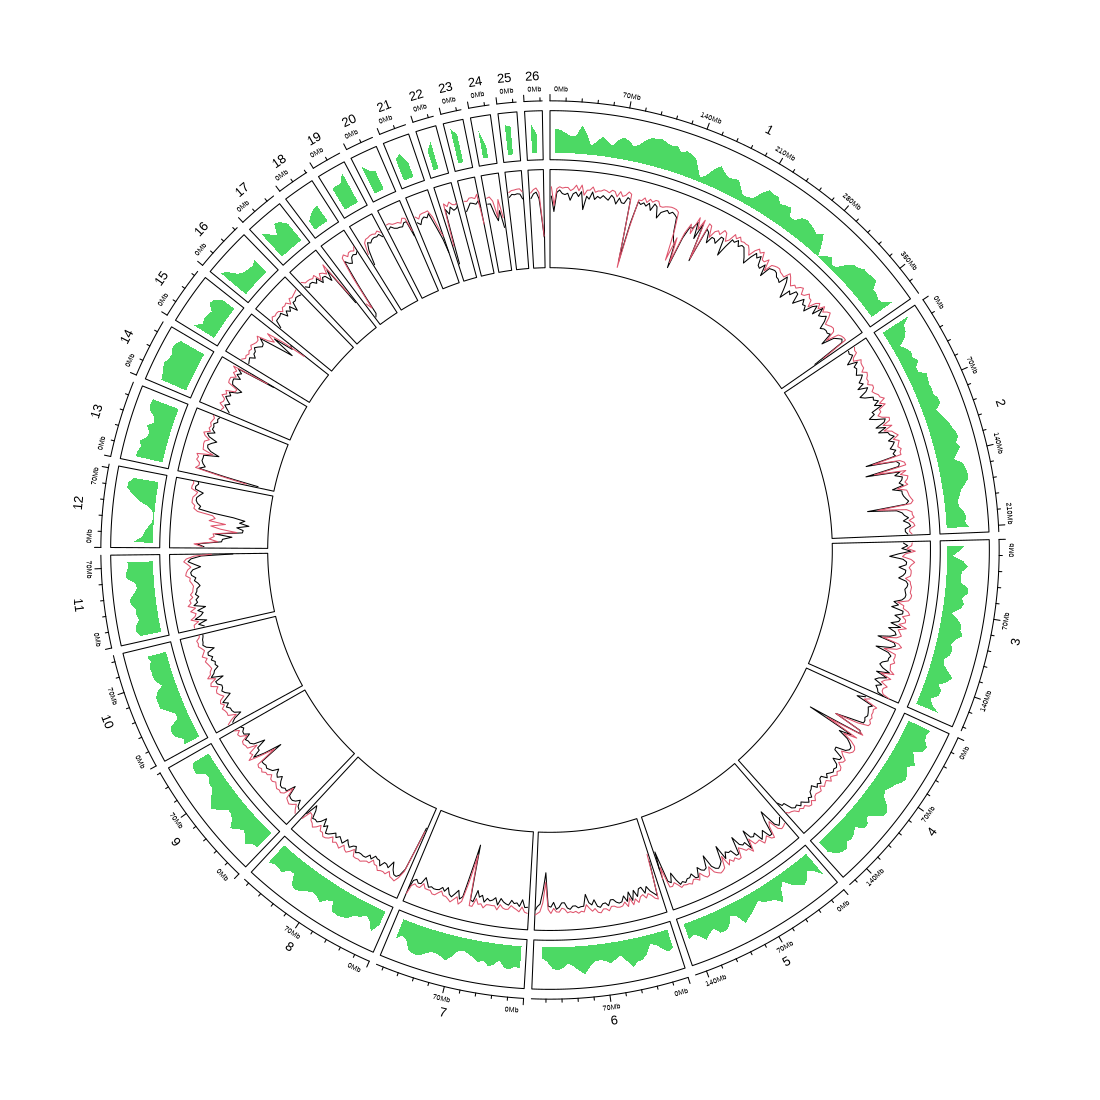

In [24]:
circos.clear()
options(repr.plot.width=11, repr.plot.height=11, repr.plot.res = 100)
circos.par( start.degree = 90, "cell.padding" = c(0.02, 0, 0.02, 0))
circos.genomicInitialize(x)
circos.genomicDensity(features, col = c("#4CD964"), track.height = 0.1)


circos.genomicTrack(list(jon_meth, hatchling_meth), 
    panel.fun = function(region, value, ...) {
        i = getI(...)
        circos.genomicLines(region, value, col = i, ...)
})
